# Campus-Placement-Prediction

# Objectives:


*   Gather historical data on campus placements, student profiles, and relevant factors.
*  Identify and create relevant features for predicting campus placement.

* Use the trained model to predict placement for new students.





# Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df = pd.read_csv('Placement.csv')

# Basic Information of the Dataset

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape #number of columns and rows in the dataset

(215, 15)

In [5]:
df.info() #datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum() #null values present in dataset

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.describe() #statistics of the dataset

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# EDA

In [8]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [9]:
df['status'].unique()                     #No. of students placed and not placed
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [10]:
# Top 5 students placed in Science & Technology

df[(df['degree_t']=="Sci&Tech") & (df['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [11]:
# Top 5 students placed in Commerece & Management

df[(df['degree_t']=="Comm&Mgmt") & (df['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,0,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
177,178,1,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
4,5,0,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
95,96,0,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [12]:
# Top 5 students placed in Others

df[(df['degree_t']=="Others") & (df['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
131,132,1,74.9,Others,57.0,Others,Science,62.00,Others,Yes,80.0,Mkt&Fin,60.78,Placed,360000.0
193,194,1,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.0,Mkt&HR,56.63,Placed,300000.0
185,186,1,88.0,Central,72.0,Central,Science,78.00,Others,No,82.0,Mkt&HR,71.43,Placed,252000.0
124,125,0,67.0,Central,71.0,Central,Science,64.33,Others,Yes,64.0,Mkt&HR,61.26,Placed,250000.0
148,149,1,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.0,Mkt&Fin,64.08,Placed,240000.0


# Data Preprocessing

In [13]:
df = df.drop(['sl_no','salary'],axis=1)   # dropping the sl_no and salary column as they are irrelevant for prediction purpose
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Encoding the Categorical Columns

In [14]:
df['ssc_b'] = df['ssc_b'].map({'Central':1,'Others':0}) # Encoding the ssc_b column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [15]:
df['hsc_b'] = df['hsc_b'].map({'Central':1,'Others':0}) # Encoding the hsc_b column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [16]:
df['hsc_s'] = df['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0}) # Encoding the hsc_s column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [17]:
df['degree_t'] = df['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0}) # Encoding the degree_t column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,No,96.8,Mkt&Fin,55.50,Placed


In [18]:
df['specialisation'] = df['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0}) # Encoding the specialisation column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,0,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,No,75.0,0,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,No,66.0,1,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,No,96.8,0,55.50,Placed


In [19]:
df['workex'] = df['workex'].map({'Yes':1,'No':0}) # Encoding the work experience column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,Placed


In [20]:
df['status'] = df['status'].map({'Placed':1,'Not Placed':0}) # Encoding the status column in 0 & 1
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


# Storing the Feature Matrix In X and Response in Vector y

In [21]:
X = df.drop('status',axis=1)
y= df['status']

In [22]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

# Splitting The Dataset Into The Training Set And Test Set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) #Training Data = 80% & Testing Data = 20%

# Importing the Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Training the Model

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

# Prediction on Testing Data

In [26]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

# Evaluating the Algorithms

In [27]:
from sklearn.metrics import accuracy_score

score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

print(score1,score2,score3,score4,score5,score6)

0.8837209302325582 0.7674418604651163 0.7906976744186046 0.8372093023255814 0.7906976744186046 0.7906976744186046


In [28]:
data = {
    'Algorithm': ['Logistic Regression', 'Support Vector Machine', 'KNeighbors', 'Decision Tree', 'Random Forest','Gradient Boosting'],
    'Accuracy': [88.37, 76.74, 79.06, 83.72, 79.06, 81.39]
}

In [29]:
df = pd.DataFrame(data)

Text(0, 0.5, 'Accuracy')

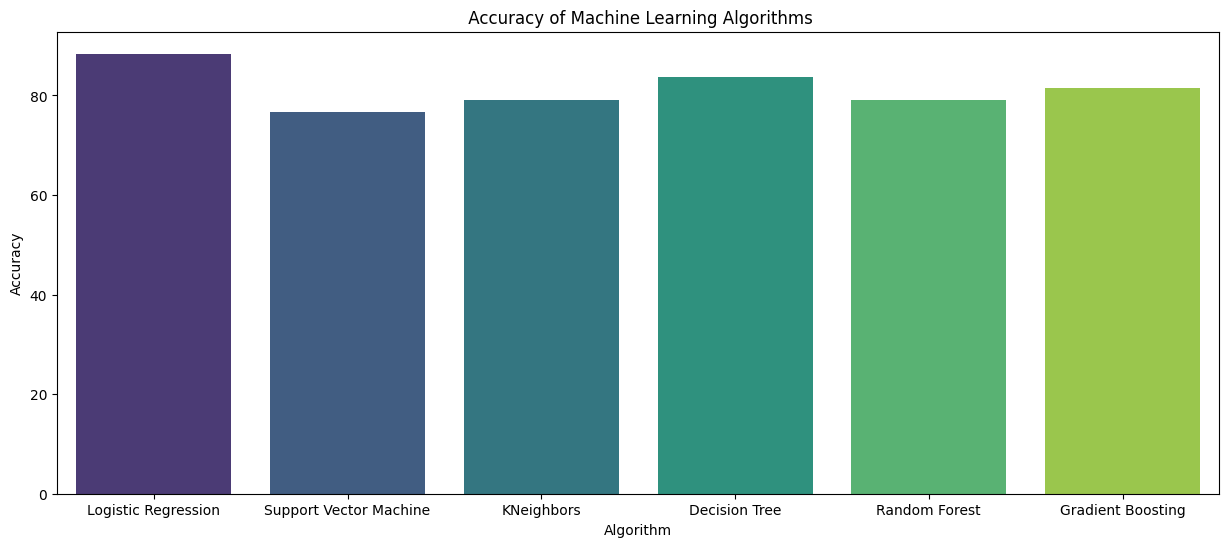

In [30]:
# Plotting the graph for comparing the accuracy of Algorithm
plt.figure(figsize=(15, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=data, palette='viridis')
plt.title(' Accuracy of Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Prediction on New Data

In [31]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':77.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':1,
    'hsc_s':1,
    'degree_p':78.0,
    'degree_t':2,
    'workex':0,
    'etest_p':75.0,
     'specialisation':1,
    'mba_p':78.8,
},index=[0])

In [32]:
# Using Logistic Regression for prediction of new data
lr= LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [33]:
p = lr.predict(new_data)
prob = lr.predict_proba(new_data)
if p==1:
  print('Placed')
  print(f"The probability of you getting a job is {prob[0][1]:.2f}")
else:
  print('Not placed')

Placed
The probability of you getting a job is 0.62


# Conclusion:

In short, the Machine Learning-based campus placement prediction project has effectively created a predictive model that enhances decision-making in student placements. Notably, logistic regression emerged as the algorithm with the highest accuracy among the utilized methods. This tool proves valuable for optimizing placement strategies and assisting decision-makers in the academic domain.